In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
raw_data = pd.read_csv("train.csv")
raw_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [6]:
df = raw_data.copy()

In [7]:
inputs = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

It is clear that we have no missing values. But are all values numerical? Let's find out!

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

From the Dtype column of info, it is clear that all entires are numerical of type int or float

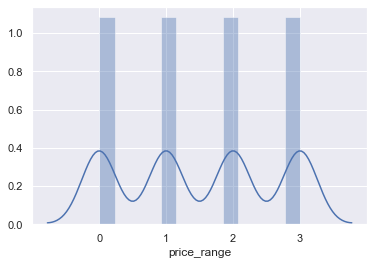

In [10]:
sns.distplot(target)

This shows that the data set has balanced target classes

In [11]:
descriptive_stats = inputs.describe().T
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [12]:
# Method to call a bar chart
def barChart(x,y, label):
    plt.figure(figsize = (13,8))
    plt.bar(x, y, label = label)
    plt.xticks(rotation = 90)
    plt.ylabel(label)
    plt.legend()

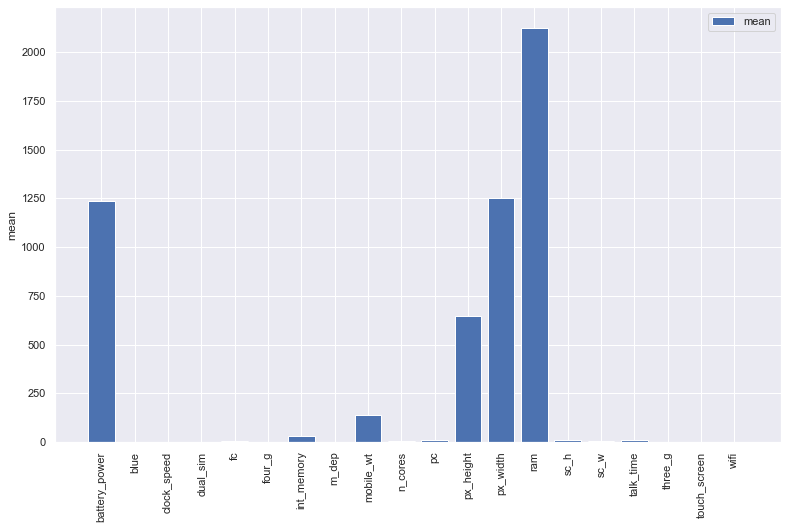

In [13]:
barChart(descriptive_stats.index,descriptive_stats["mean"], label="mean")

It is clear that the mean differs a lot and hence it is important to standardize the features

In [14]:
unique_entries = pd.DataFrame(inputs.nunique(), columns = ['values']).T
unique_entries

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
values,1094,2,26,2,20,2,63,10,121,8,21,1137,1109,1562,15,19,19,2,2,2


In [15]:
categorical_features = []
numerical_features = []

for feature in unique_entries.columns:
    if(unique_entries.loc["values", feature] == 2):
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

It doesn't make sense to standardize categorical features, hence we will avoid doing so.

### Standardization

In [16]:
features_to_standardize = inputs.drop(categorical_features, axis = 1)

In [17]:
features_to_standardize

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [18]:
# Create an object of StandardScalar class & fit the raw data to obtain a standardized data
scaler = StandardScaler()
numerical_inputs = scaler.fit_transform(features_to_standardize)

In [19]:
numerical_inputs = pd.DataFrame(numerical_inputs, columns = features_to_standardize.columns) 

In [20]:
type(numerical_inputs)

pandas.core.frame.DataFrame

In [21]:
categorical_inputs = inputs.drop(numerical_features, axis = 1)

In [22]:
type(categorical_inputs)

pandas.core.frame.DataFrame

In [23]:
inputs = categorical_inputs.join(numerical_inputs)

In [24]:
inputs

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0,0,0,1,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,1,1,1,1,1,0,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,1,1,1,1,1,0,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,1,0,0,1,0,0,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1,0,1,1,1,0,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493
1996,1,1,0,1,1,1,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303
1997,0,1,1,1,1,0,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394
1998,0,0,1,1,1,1,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493


## Feature Selection

### Correlation with Target

In [25]:
# Correlation Matrix
corrMatrix = df.corr()
# Masking the lower half of the correlation matrix for better visualization
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),
                                      k=1).astype(np.bool))

In [26]:
# Method to view heatmap of a Matrix
def heatMap(matrix):
    plt.figure(figsize = (20, 15))
    s = sns.heatmap(matrix,
                   annot = True, 
                   cmap = 'RdYlGn',
                   vmin = -1, 
                   vmax = 1)
    s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
    s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
    plt.title('Correlation Heatmap')
    plt.show()

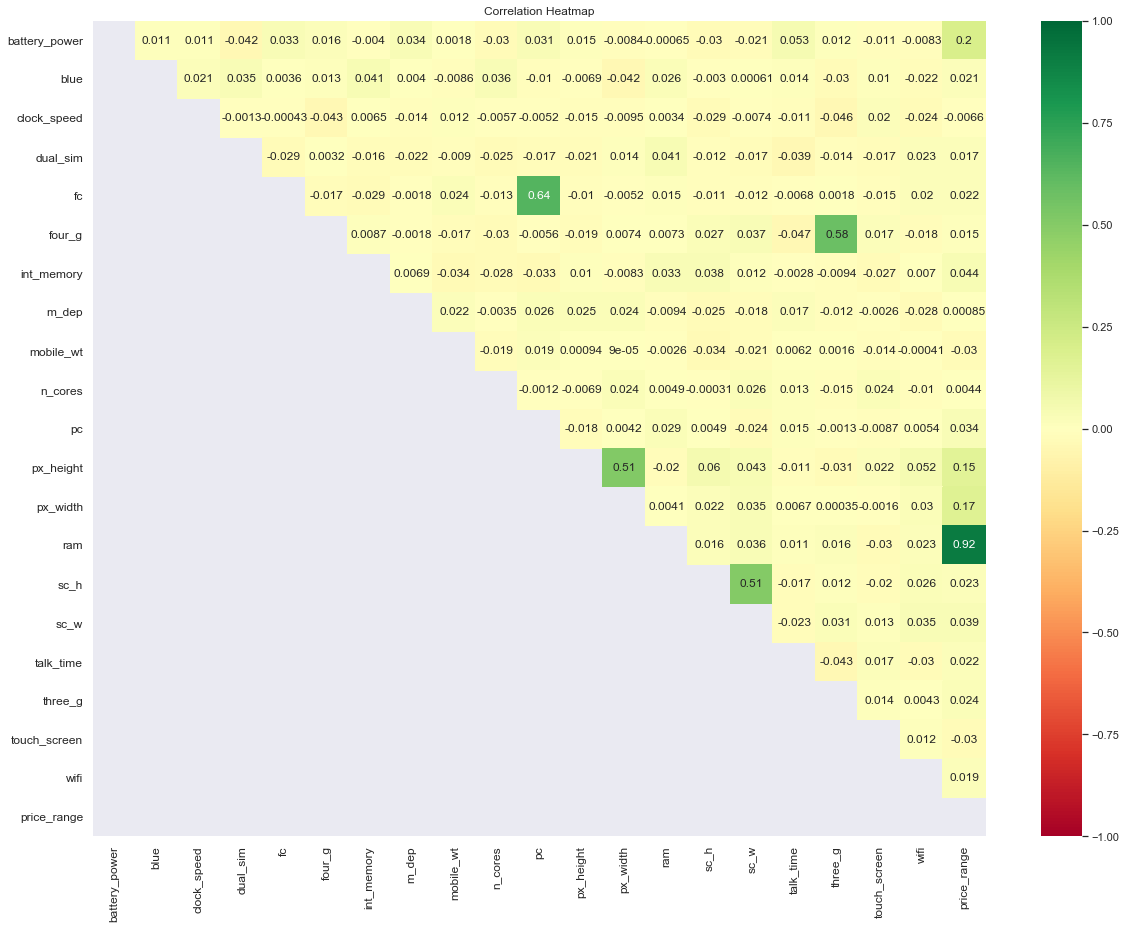

In [27]:
# Displaying the heat map
heatMap(upper)

**Features that have high correlation target**

- ram
- battery_power
- px_width
- px_height

Let us eliminate the features that have very low correlation with target

In [28]:
# Absolute Correlation Matrix
absCorrMatrix = abs(corrMatrix)

In [29]:
# Absolute Correlation of features with target
corrWithTarget = pd.DataFrame(absCorrMatrix["price_range"])
corrWithTarget.drop(['price_range'], axis = 0, inplace = True)

In [30]:
corrWithTarget

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,0.030302
n_cores,0.004399


In [31]:
# Let's find out the features that have very less correation with target
features_to_drop = [feature for feature in corrWithTarget.index if (corrWithTarget.loc[feature, "price_range"] < 0.01)]

In [32]:
features_to_drop

['clock_speed', 'm_dep', 'n_cores']

In [33]:
inputs = inputs.drop(columns = features_to_drop, axis=1)

In [34]:
inputs

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0,0,0,1,-0.902597,-0.762495,-1.380644,1.349249,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,1,1,1,1,1,0,-0.495139,-0.992890,1.155024,-0.120059,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,1,1,1,1,1,0,-1.537686,-0.532099,0.493546,0.134244,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,1,0,0,1,0,0,-1.419319,-0.992890,-1.215274,-0.261339,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1,0,1,1,1,0,1.325906,2.002254,0.658915,0.021220,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,-1.011860,-0.992890,-1.656260,-0.967737,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493
1996,1,1,0,1,1,1,1.653694,-0.992890,0.383299,1.320993,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303
1997,0,1,1,1,1,0,1.530773,-0.762495,0.217930,-0.911225,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394
1998,0,0,1,1,1,1,0.622527,-0.071307,0.769162,0.134244,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493


### Test Train Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 72)

In [40]:
X_train.shape

(1600, 17)

In [41]:
X_test.shape

(400, 17)

In [42]:
y_train.shape

(1600,)

In [43]:
y_test.shape

(400,)

## Model Selection

In [44]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class = 'multinomial'),
        'params': {
            'penalty': ['l1','l2', 'elasticnet'],
            'C': [1,10,20],
            'solver': ['newton-cg','saga','sag','lbfgs']
        }
    },
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'n_estimators': [1,5,10]
        }
    },
    
}

In [45]:
scores = []

for model_name, mp in model_params.items():
    model =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False, n_jobs = -1)
    model.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': model.best_score_,
        'best_params': model.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.973125,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}"
1,svm,0.971250,"{'C': 10, 'decision_function_shape': 'ovo', 'g..."
2,decision_tree,0.855000,{'criterion': 'entropy'}
3,random_forest,0.829375,"{'criterion': 'entropy', 'n_estimators': 10}"


## Forward Selection

Let's choose one feature at a time in the increasing order of correlation with target, and try to test our model's predictions